### Wine Dataset Simple

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import tree


from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

In [38]:
# Load the dataset
df = pd.read_csv(r'D:\lums\work stuff\notebooks\Week 2\Wine\WineQT.csv')

# print(df.describe())
# print(df.info())
print(df.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

### Prepare the Data

- Check missing values
- Check duplicates
- Drop useless columns


In [39]:
# Check for missing values
print(df.isnull().sum())

# Check duplicates
duplicates = df.duplicated()
# View how many duplicate rows exist
print("Number of duplicate rows:", duplicates.sum())

print(df.shape)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
Number of duplicate rows: 0
(1143, 13)


In [40]:
# Remove the duplicates
df_cleaned = df.drop_duplicates()
print(df_cleaned.shape)
df = df_cleaned

# Drop Id column
df.drop(columns=['Id'], inplace=True)

df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)


(1143, 13)


### Split the Data

[0 1]


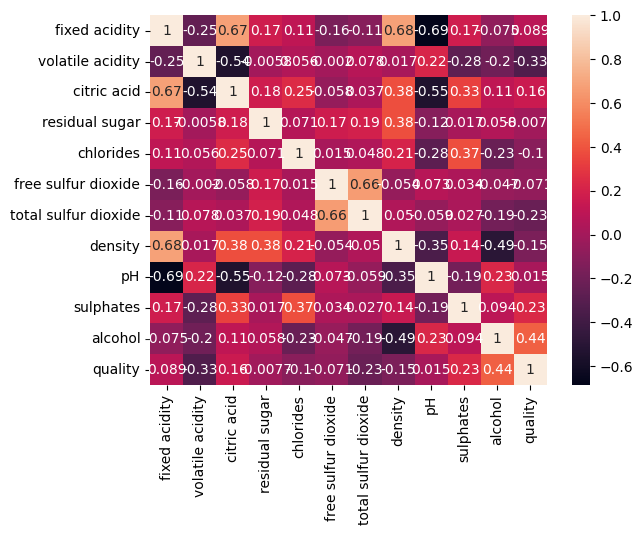

quality                 1.000000
alcohol                 0.440397
sulphates               0.234221
citric acid             0.155144
fixed acidity           0.088682
pH                      0.015251
residual sugar         -0.007732
free sulfur dioxide    -0.070577
chlorides              -0.100601
density                -0.154255
total sulfur dioxide   -0.226680
volatile acidity       -0.330787
Name: quality, dtype: float64


In [41]:
X = df.drop(columns=['quality'])
y = df['quality']
print(y.unique())
# y ranges from 3 to 8

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sns.heatmap(df.corr(), annot=True)
plt.show()

correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

### Preprocessing

In [42]:
print(X.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [43]:
numeric_features = X.columns.tolist()

numeric_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

### Gridsearch 

In [44]:
# Implementing Grid Search for hyperparameter tuning

model_params = {
    'Decision Tree' : {
        'model' : DecisionTreeClassifier(random_state=42),
        'params' : {
            'classifier__max_depth' : [3,5,7,None],
            'classifier__min_samples_split' : [2,5,10]
        }
    },
    'kNN' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'classifier__n_neighbors' : list(range(1, 17)),
            'classifier__weights' : ['uniform', 'distance'],
            'classifier__p' : [1, 2, 3]
        }
    },
    'Naive Bayes' : {
        'model' : GaussianNB(),
        'params' : {
            'classifier__var_smoothing' : [1e-9, 1e-10, 1e-11]
        }
    }
}

# Run grid search for each model
for name, mp in model_params.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', mp['model'])
    ])
    grid = GridSearchCV(pipe, mp['params'], cv=5)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"🔍 {name} Results")
    print("Best CV Accuracy:", grid.best_score_)
    print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
    print("Best Params:", grid.best_params_)
    print("-" * 50)


🔍 Decision Tree Results
Best CV Accuracy: 0.7199243379571248
Test Set Accuracy: 0.7074235807860262
Best Params: {'classifier__max_depth': 7, 'classifier__min_samples_split': 10}
--------------------------------------------------
🔍 kNN Results
Best CV Accuracy: 0.7581696991533058
Test Set Accuracy: 0.7685589519650655
Best Params: {'classifier__n_neighbors': 7, 'classifier__p': 3, 'classifier__weights': 'distance'}
--------------------------------------------------
🔍 Naive Bayes Results
Best CV Accuracy: 0.727586621029244
Test Set Accuracy: 0.7467248908296943
Best Params: {'classifier__var_smoothing': 1e-09}
--------------------------------------------------
